In [9]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

%matplotlib inline 

# Data Cleaning and Preparation

For the purpose of data cleaning purposes, we'll be using the dirty insurance dataset first. 

In [10]:
dirty_insurance_df = pd.read_csv('dirty_insurance.csv')
print(('rows,columns'))
print(dirty_insurance_df.shape)

rows,columns
(1339, 8)


In [11]:
dirty_insurance_df.info() 
#always make sure to check the types of the labels. You can change type using .astype()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  1339 non-null   object 
 1   age          1339 non-null   int64  
 2   sex          1339 non-null   object 
 3   bmi          1337 non-null   float64
 4   children     1339 non-null   int64  
 5   smoker       1339 non-null   object 
 6   region       1339 non-null   object 
 7   charges      1336 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [12]:
dirty_insurance_df.dtypes #types of data

customer_id     object
age              int64
sex             object
bmi            float64
children         int64
smoker          object
region          object
charges        float64
dtype: object

In [13]:
print("Unique value count:")
cols = dirty_insurance_df.columns.tolist()
for col in cols:
    print(col + " = " + str(len(dirty_insurance_df[col].unique())))

Unique value count:
customer_id = 1336
age = 47
sex = 4
bmi = 537
children = 6
smoker = 1
region = 9
charges = 1334


In [14]:
dirty_insurance_df.head(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
0,m18331172523,18,male,33.77,1,no,southeast,1725.55230
1,m18340113711,18,male,34.10,0,no,southeast,NaN
2,f18260219885,18,female,NaN,0,no,nrtheast,2198.18985
3,f18382339335,18,woman,38.67,2,no,northeast,3393.35635
4,f18350221175,18,female,35.63,0,no,n.west,2211.13075
5,f18350221175,18,female,35.63,0,no,n.west,2211.13075
6,f18300213467,18,female,30.12,0,no,northeast,21344.84670
7,m18230170545,18,man,NaN,0,no,nrtheast,NaN
8,m18250155125,18,male,25.18,0,no,northeast,15518.18025
9,f18360361435,18,female,36.85,0,no,s.east,36149.48350


In [15]:
dirty_insurance_df.tail(10)

,customer_id,age,sex,bmi,children,smoker,region,charges
1329,m64380144121,64,male,38.19,0,no,northeast,14410.93210
1330,f64220270341,64,female,22.99,0,no,southeast,27037.91410
1331,m64370142195,64,male,37.91,0,no,n.west,14210.53595
1332,f64390143131,64,female,39.70,0,no,s.west,14319.03100
1333,f64350143163,64,female,35.97,0,no,southeast,14313.84630
1334,f64312160675,64,female,31.83,2,no,northeast,16069.08475
1335,f64260293315,64,female,26.89,0,no,n.west,29330.98315
1336,m64260143979,64,male,26.41,0,no,northeast,14394.55790
1337,m64362495724,64,male,36.96,2,no,southeast,49577.66240
1338,m64230269244,64,male,23.76,0,no,southeast,26926.51440


In [16]:
dirty_insurance_df.describe()

,age,bmi,children,charges
count,1339.000000,1337.000000,1339.000000,1336.000000
mean,39.194922,30.678751,1.092606,13264.230983
std,14.051691,6.098401,1.205529,12100.401585
min,18.000000,15.960000,0.000000,1121.873900
25%,26.500000,26.320000,0.000000,4744.325050
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [17]:
dirty_insurance_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1339.0,39.194922,14.051691,18.0000,26.50000,39.000,51.000000,64.00000
bmi,1337.0,30.678751,6.098401,15.9600,26.32000,30.400,34.700000,53.13000
children,1339.0,1.092606,1.205529,0.0000,0.00000,1.000,2.000000,5.00000
charges,1336.0,13264.230983,12100.401585,1121.8739,4744.32505,9382.033,16604.302645,63770.42801


In [18]:
dirty_insurance_df.columns

Index(['customer_id', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

In [19]:
print(dirty_insurance_df.isnull().sum())

customer_id    0
age            0
sex            0
bmi            2
children       0
smoker         0
region         0
charges        3
dtype: int64


In [20]:
dirty_insurance_df.notnull().sum()

customer_id    1339
age            1339
sex            1339
bmi            1337
children       1339
smoker         1339
region         1339
charges        1336
dtype: int64

In [21]:
print("Columns with missing values: ")
print(dirty_insurance_df.columns[dirty_insurance_df.isnull().any()].tolist())

Columns with missing values: 
['bmi', 'charges']


Since BMI and charges has 2 rows with missing values, we'll be dropping these rows with missing values

In [22]:
droppedmissing_dirty_insurance_df = dirty_insurance_df.dropna() #drop rows with NaN values

In [23]:
droppedmissing_dirty_insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
dtype: int64

In [24]:
droppedmissing_dirty_insurance_df.shape

(1335, 8)

Since there are only a few rows with missing values, we can also impute these values by using the mean/median. Let's see first what to use for bmi and charges. 

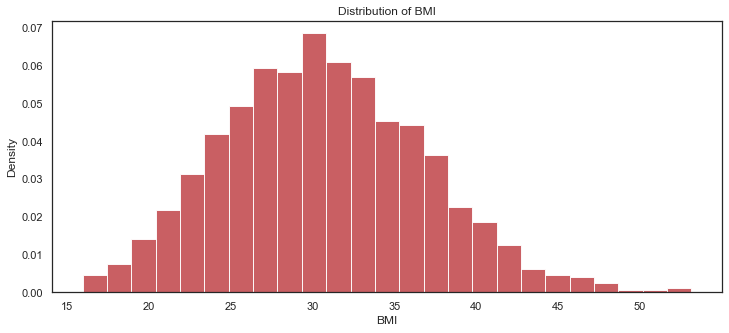

In [25]:
#Using matplotlib to show histogram of BMI 

plt.figure(figsize=(12,5))
dirty_insurance_df['bmi'].hist(bins='auto', alpha=0.9, density=True, color='r') 
#density=True for density, if it's not true, counts will be shown
plt.title('Distribution of BMI')
plt.ylabel('Density')
plt.xlabel('BMI')
plt.grid(b=None)

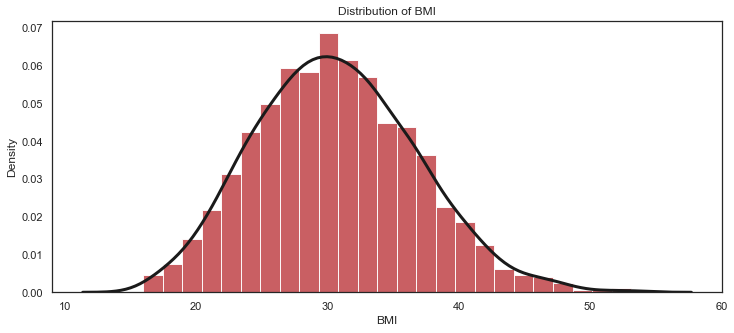

In [26]:
#Let's try seaborn to plot the distribution. Seaborn plots the distribution with a best fit line using the distplot command

plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
plt.ylabel('Density')
ax = sns.distplot(insurance_df["bmi"], color = 'r', kde_kws={"color":"k", "lw":3}, axlabel = 'BMI', hist_kws=dict(alpha=0.9)) 
#axlablel for x label title while hist_kws=dic(alpha=0.9) for transparency of color, kde for line color and properties

In [27]:
#Since BMI has a symmetric distribution, we'll be using the mean when imputing values on BMI
mean_bmi = dirty_insurance_df['bmi'].mean()
print("Mean BMI of customers = " + str(mean_bmi))
print("NA count before fill = " + str(len(dirty_insurance_df[dirty_insurance_df['bmi'].isna()])))
dirty_insurance_df['bmi'] = dirty_insurance_df['bmi'].fillna(mean_bmi)
#for a one-liner code, you may also do this
#dirty_insurance_df['bmi'] = dirty_insurance_df['bmi'].fillna(dirty_insurance_df['bmi'].mean())
print("NA count before fill = " + str(len(dirty_insurance_df[dirty_insurance_df['bmi'].isna()])))

Mean BMI of customers = 30.67875093492893
NA count before fill = 2
NA count before fill = 0


In [28]:
dirty_insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        3
dtype: int64

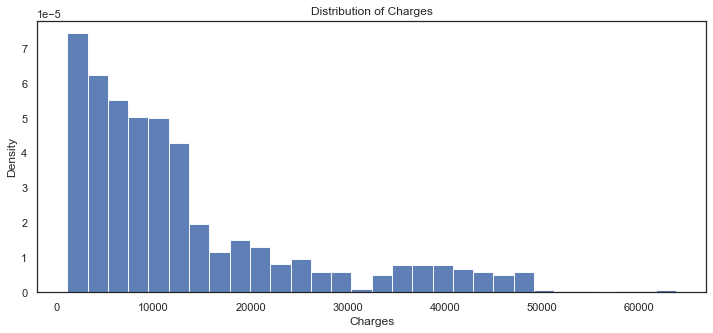

In [29]:
#Using matplotlib to show histogram of charges

plt.figure(figsize=(12,5))
dirty_insurance_df['charges'].hist(bins='auto', alpha=0.9, density=True, color='b')
plt.title('Distribution of Charges')
plt.ylabel('Density')
plt.xlabel('Charges')
plt.grid(b=None)

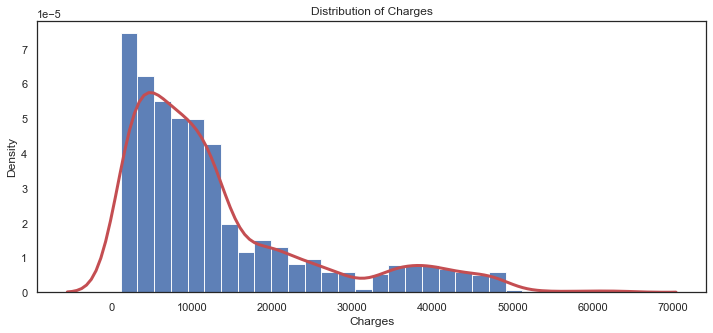

In [30]:
#Let's try seaborn to plot the distribution. Seaborn plots the distribution with a best fit line using the distplot command

plt.figure(figsize=(12,5))
plt.title("Distribution of Charges")
plt.ylabel('Density')
ax = sns.distplot(insurance_df["charges"], color = 'b', kde_kws={"color":"r", "lw":3}, axlabel = 'Charges', hist_kws=dict(alpha=0.9)) 
#axlablel for x label title while hist_kws=dic(alpha=0.9) for transparency of color, kde for line color and properties

In [31]:
#Since charges has an asymmetric distribution, we'll be using the median when imputing values on charges
median_charges = dirty_insurance_df['charges'].median()
print("Median of Charges of customers = " + str(median_charges))
print("NA count before fill = " + str(len(dirty_insurance_df[dirty_insurance_df['charges'].isna()])))
dirty_insurance_df['charges'] = dirty_insurance_df['charges'].fillna(median_charges)
#for a one-liner code, you may also do this
#dirty_insurance_df['charges'] = dirty_insurance_df['charges'].fillna(dirty_insurance_df['charges'].median())
print("NA count before fill = " + str(len(dirty_insurance_df[dirty_insurance_df['charges'].isna()])))

Median of Charges of customers = 9382.033
NA count before fill = 3
NA count before fill = 0


In [32]:
dirty_insurance_df.isnull().sum()

customer_id    0
age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
dtype: int64

#### **3 Variability of column entries**

Let's check unique values for each column of the dataset.

In [33]:
dirty_insurance_df.nunique()

customer_id    1336
age              47
sex               4
bmi             537
children          6
smoker            1
region            9
charges        1334
dtype: int64

In [34]:
dirty_insurance_df.count()

customer_id    1339
age            1339
sex            1339
bmi            1339
children       1339
smoker         1339
region         1339
charges        1339
dtype: int64

In [35]:
dirty_insurance_df.customer_id.value_counts()

f18350221175    2
m19300163931    2
m23340182643    2
f23330107933    1
m21230151549    1
               ..
f49233241055    1
f26172144505    1
f21390202641    1
m41372726525    1
m53280986902    1
Name: customer_id, Length: 1336, dtype: int64

In [36]:
print(dirty_insurance_df[dirty_insurance_df.duplicated(['customer_id'], keep=False)])

      customer_id  age     sex    bmi  children smoker     region     charges
4    f18350221175   18  female  35.63         0     no     n.west  2211.13075
5    f18350221175   18  female  35.63         0     no     n.west  2211.13075
80   m19300163931   19    male  30.59         0     no  northwest  1639.56310
107  m19300163931   19    male  30.59         0     no  northwest  1639.56310
222  m23340182643   23    male  34.40         0     no     s.west  1826.84300
223  m23340182643   23    male  34.40         0     no     s.west  1826.84300


In [37]:
duplicate_customer_id = dirty_insurance_df[dirty_insurance_df.duplicated()]
print(duplicate_customer_id)

      customer_id  age     sex    bmi  children smoker     region     charges
5    f18350221175   18  female  35.63         0     no     n.west  2211.13075
107  m19300163931   19    male  30.59         0     no  northwest  1639.56310
223  m23340182643   23    male  34.40         0     no     s.west  1826.84300


Customer_id which should be unique for all has 1332 unique values and 1335 counts on the dataset. Upon checking, 3 of these customer ids have been duplicated. Let's drop these duplicate rows. 

In [38]:
dirty_insurance_df = dirty_insurance_df.drop_duplicates() #removes all duplicate rows based on all columns
#to remove duplicates on specific columns
#use this instead
#dirty_insurance_df.drop_duplicates(subset ="customer_id", keep = 'last', inplace = True) 

In [39]:
dirty_insurance_df.shape

(1336, 8)

In [40]:
print(dirty_insurance_df[dirty_insurance_df.duplicated(['customer_id'], keep=False)])

Empty DataFrame
Columns: [customer_id, age, sex, bmi, children, smoker, region, charges]
Index: []


In [41]:
# inspect all categorical variables

print(dirty_insurance_df['sex'].value_counts())
print(dirty_insurance_df['smoker'].value_counts())
print(dirty_insurance_df['region'].value_counts())

male      672
female    660
woman       2
man         2
Name: sex, dtype: int64
no    1336
Name: smoker, dtype: int64
southeast    359
northeast    319
s.west       311
northwest    280
n.west        45
southwest     14
s.east         4
nrtheast       2
n.east         2
Name: region, dtype: int64


In [42]:
# inspect all numerical variables

print(dirty_insurance_df['age'].value_counts(bins=5))
print(dirty_insurance_df['bmi'].value_counts(bins=5))
print(dirty_insurance_df['children'].value_counts(bins=5))
print(dirty_insurance_df['charges'].value_counts(bins=5))

(17.953, 27.2]    360
(45.6, 54.8]      258
(54.8, 64.0]      242
(36.4, 45.6]      239
(27.2, 36.4]      237
Name: age, dtype: int64
(23.394, 30.828]    552
(30.828, 38.262]    482
(15.922, 23.394]    157
(38.262, 45.696]    128
(45.696, 53.13]      17
Name: bmi, dtype: int64
(-0.006, 1.0]    897
(1.0, 2.0]       239
(2.0, 3.0]       157
(3.0, 4.0]        25
(4.0, 5.0]        18
Name: children, dtype: int64
(1059.224, 13651.585]     933
(13651.585, 26181.296]    215
(26181.296, 38711.006]     93
(38711.006, 51240.717]     89
(51240.717, 63770.428]      6
Name: charges, dtype: int64


In [43]:
print(dirty_insurance_df.sex.value_counts())

male      672
female    660
woman       2
man         2
Name: sex, dtype: int64


Since we have 4 labels, we need to fix these labels to only two consistent names. 

In [44]:
dirty_insurance_df.sex.replace('woman','female',inplace=True)
dirty_insurance_df.sex.replace('man','male',inplace=True)
print(dirty_insurance_df.sex.value_counts())

male      674
female    662
Name: sex, dtype: int64


In [45]:
print(dirty_insurance_df.region.value_counts())

southeast    359
northeast    319
s.west       311
northwest    280
n.west        45
southwest     14
s.east         4
nrtheast       2
n.east         2
Name: region, dtype: int64


In [46]:
dirty_insurance_df['region'].replace('s.west','southwest', inplace=True)
dirty_insurance_df['region'].replace('n.west','northwest', inplace=True)
dirty_insurance_df['region'].replace('s.east','southeast', inplace=True)
dirty_insurance_df['region'].replace('n.east','northeast', inplace=True)
dirty_insurance_df['region'].replace('nrtheast','northeast', inplace=True)

In [47]:
print(dirty_insurance_df['region'].value_counts())

southeast    363
southwest    325
northwest    325
northeast    323
Name: region, dtype: int64


Let's check for variability in values 

In [48]:
dirty_insurance_df.smoker.nunique()

1

Since smoker values is only 1, we'll be dropping this column since it doesn't have any contribution in our analysis moving forward.

In [49]:
dirty_insurance_df = dirty_insurance_df.drop(['smoker'],axis=1) #axis if columns, axis = 0 if index
dirty_insurance_df.head(10)

,customer_id,age,sex,bmi,children,region,charges
0,m18331172523,18,male,33.770000,1,southeast,1725.55230
1,m18340113711,18,male,34.100000,0,southeast,9382.03300
2,f18260219885,18,female,30.678751,0,northeast,2198.18985
3,f18382339335,18,female,38.670000,2,northeast,3393.35635
4,f18350221175,18,female,35.630000,0,northwest,2211.13075
6,f18300213467,18,female,30.120000,0,northeast,21344.84670
7,m18230170545,18,male,30.678751,0,northeast,9382.03300
8,m18250155125,18,male,25.180000,0,northeast,15518.18025
9,f18360361435,18,female,36.850000,0,southeast,36149.48350
10,m18150169464,18,male,15.960000,0,northeast,1694.79640


Now, the dataset is already cleaned for initial analysis! 

# Exploratory Data Analysis Exercise

For the exploratory data analysis exercise, we'll be using a cleaned insurance dataset with significant smoker and non-smoker values. 

In [4]:
# Load the insurance.csv data set

insurance_df = pd.read_csv('insurance_regression.csv')
print('(rows,columns)')
print(insurance_df.shape) #to check number of rows and columns


(rows,columns)
(1338, 7)


In [253]:
insurance_df.info() 
#always make sure to check the types of the labels. You can change type using .astype()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [254]:
insurance_df.dtypes #types of data

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [255]:
print("Unique value count:")
cols = insurance_df.columns.tolist()
for col in cols:
    print(col + " = " + str(len(insurance_df[col].unique())))

Unique value count:
age = 47
sex = 2
bmi = 548
children = 6
smoker = 2
region = 4
charges = 1337


In [7]:
insurance_df.head() #show a summary of data, first 5

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
insurance_df.tail() #show last 5 rows

,age,sex,bmi,children,smoker,region,charges
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
877,33,male,33.440,5,no,southeast,6653.78860
1130,39,female,23.870,5,no,southeast,8582.30230
937,39,female,24.225,5,no,northwest,8965.79575


In [35]:
insurance_df.index #row labels 

Int64Index([ 172,  629,  772,  155,  318,  675,   81,  805,  933,  488,
            ...
              32, 1085,  640,   71,  568,  413,  425,  877, 1130,  937],
           dtype='int64', length=1338)

In [8]:
insurance_df.columns #column labels

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
#find columns with missing values
print(insurance_df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [16]:
print(insurance_df.notnull().sum())

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64


In [ ]:
insurance_df.describe() 
#to calculate statistical data of numerical values of the dataframe. Here, only the age, bmi, children and charges have numerical values

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can confirm that the following are categorical/nominal columns:
1. Sex (2 values)
2. Smoker (2 values) 
3. Region (4 values)

In [257]:
insurance_df.median()

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [258]:
insurance_df.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [259]:
insurance_df.mean()

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [260]:
insurance_df.var(ddof=0)

age         1.972539e+02
bmi         3.716009e+01
children    1.452127e+00
charges     1.465428e+08
dtype: float64

In [261]:
insurance_df.var(ddof=1)

age         1.974014e+02
bmi         3.718788e+01
children    1.453213e+00
charges     1.466524e+08
dtype: float64

In [262]:
insurance_df.mad() #mean average absolute deviation

age           12.248931
bmi            4.897871
children       0.985405
charges     9091.126581
dtype: float64

In [269]:
#Check number of unique values and count of values
for column in insurance_df.columns:
    print("\n" + column)
    print("Unique values =", insurance_df[column].nunique())
    print("Count of values =", insurance_df[column].count())


age
Unique values = 47
Count of values = 1338

sex
Unique values = 2
Count of values = 1338

bmi
Unique values = 548
Count of values = 1338

children
Unique values = 6
Count of values = 1338

smoker
Unique values = 2
Count of values = 1338

region
Unique values = 4
Count of values = 1338

charges
Unique values = 1337
Count of values = 1338


In [272]:
# inspect all categorical variables

print(insurance_df['sex'].value_counts())
print(insurance_df['smoker'].value_counts())
print(insurance_df['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


In [274]:
# inspect all numerical variables

print(insurance_df['age'].value_counts(bins=5))
print(insurance_df['bmi'].value_counts(bins=5))
print(insurance_df['children'].value_counts(bins=5))
print(insurance_df['charges'].value_counts(bins=5))

(17.953, 27.2]    362
(45.6, 54.8]      258
(54.8, 64.0]      242
(36.4, 45.6]      239
(27.2, 36.4]      237
Name: age, dtype: int64
(23.394, 30.828]    553
(30.828, 38.262]    483
(15.922, 23.394]    157
(38.262, 45.696]    128
(45.696, 53.13]      17
Name: bmi, dtype: int64
(-0.006, 1.0]    898
(1.0, 2.0]       240
(2.0, 3.0]       157
(3.0, 4.0]        25
(4.0, 5.0]        18
Name: children, dtype: int64
(1059.224, 13651.585]     934
(13651.585, 26181.296]    215
(26181.296, 38711.006]     94
(38711.006, 51240.717]     89
(51240.717, 63770.428]      6
Name: charges, dtype: int64


In [706]:
#sort data with age in ascending order 
insurance_df.sort_values(by=['age'], inplace=True)
display(insurance_df)

,age,sex,bmi,children,smoker,region,charges
1248,18,female,39.820,0,no,southeast,1633.96180
482,18,female,31.350,0,no,southeast,1622.18850
492,18,female,25.080,0,no,northeast,2196.47320
525,18,female,33.880,0,no,southeast,11482.63485
529,18,male,25.460,0,no,northeast,1708.00140
...,...,...,...,...,...,...,...
398,64,male,25.600,2,no,southwest,14988.43200
335,64,male,34.500,0,no,southwest,13822.80300
378,64,female,30.115,3,no,northwest,16455.70785
1265,64,male,23.760,0,yes,southeast,26926.51440


In [51]:
#create another column showing bmi stats 
bmi_conditions = [
    (insurance_df['bmi'] < 18.5),
    (insurance_df['bmi'] >= 18.5) & (insurance_df['bmi'] < 25),
    (insurance_df['bmi'] >= 25) & (insurance_df['bmi'] < 30),
    (insurance_df['bmi'] >= 30) & (insurance_df['bmi'] < 35),
    (insurance_df['bmi'] >=35)
    ]
bmi_values = ['underweight', 'normal', 'overweight', 'obese', 'extremely obese']

insurance_df['bmi_stats'] = np.select(bmi_conditions, bmi_values)

insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_stats
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [713]:
#create another column showing age ranges
age_conditions = [
    (insurance_df['age'] < 20),
    (insurance_df['age'] >= 20) & (insurance_df['age'] < 30),
    (insurance_df['age'] >= 30) & (insurance_df['age'] < 40),
    (insurance_df['age'] >= 40) & (insurance_df['age'] < 50),
    (insurance_df['age'] >= 50) & (insurance_df['age'] < 60),
    (insurance_df['age'] >= 60),
    ]

age_values = ['below 20', '20-30', '30-40', '40-50', '50-60','above 60']

insurance_df['age_stats'] = np.select(age_conditions, age_values)

insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges,bmi_stats,age_stats
398,64,male,25.600,2,no,southwest,14988.43200,overweight,above 60
335,64,male,34.500,0,no,southwest,13822.80300,obese,above 60
378,64,female,30.115,3,no,northwest,16455.70785,obese,above 60
1265,64,male,23.760,0,yes,southeast,26926.51440,normal,above 60
635,64,male,38.190,0,no,northeast,14410.93210,extremely obese,above 60


# Let's plot and graph! 

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Children')]

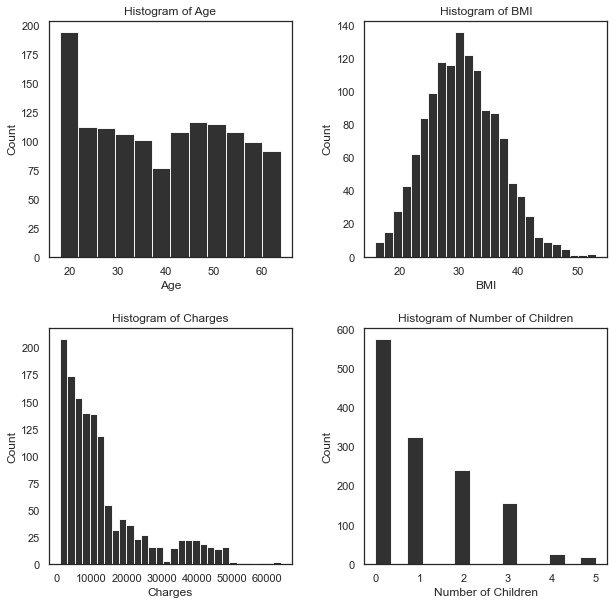

In [307]:
#To get a more visual representation of the numerical data, let's create a histogram of all columns
hist = insurance_df.hist(bins='auto',figsize=(10,10),layout=(2,2),grid=False,alpha=0.9, density=False, color='k')

hist[0,0].set_title('Histogram of Age')
hist[0,0].set(xlabel='Age',ylabel='Count')
hist[0,1].set_title('Histogram of BMI')
hist[0,1].set(xlabel='BMI',ylabel='Count')
hist[1,0].set_title('Histogram of Charges')
hist[1,0].set(xlabel='Charges',ylabel='Count')
hist[1,1].set_title('Histogram of Number of Children')
hist[1,1].set(xlabel='Number of Children',ylabel='Count')

Let's try this in seaborn exploring different figure styles but now plotting the distribution with its corresponding density with a fitted line incorporated. 

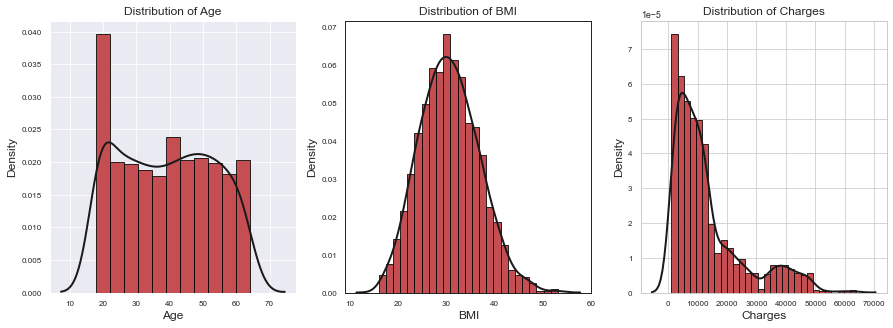

In [370]:
f = plt.figure(figsize=(15,5))
gs = f.add_gridspec(1,3)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0,0])
    a = sns.distplot(insurance_df["age"], hist_kws={'edgecolor':'black','color':'r','alpha':1}, kde_kws={"color":"k", "lw":2})
    a.axes.set_title("Distribution of Age", fontsize=12)
    a.set_xlabel("Age", fontsize=12)
    a.set_ylabel("Density", fontsize=12)
    a.tick_params(labelsize=8)
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0,1])
    b = sns.distplot(insurance_df["bmi"], color = 'r', hist_kws={'edgecolor':'black','color':'r','alpha':1}, kde_kws={"color":"k", "lw":2})
    b.axes.set_title("Distribution of BMI", fontsize=12)
    b.set_xlabel("BMI", fontsize=12)
    b.set_ylabel("Density", fontsize=12)
    b.tick_params(labelsize=8)
    
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[0,2])
    c = sns.distplot(insurance_df["charges"], color = 'r', hist_kws={'edgecolor':'black','color':'r','alpha':1}, kde_kws={"color":"k", "lw":2})
    c.axes.set_title("Distribution of Charges", fontsize=12)
    c.set_xlabel("Charges", fontsize=12)
    c.set_ylabel("Density", fontsize=12)
    c.tick_params(labelsize=8)
    
#with sns.axes_style("whitegrid"):
#    ax = f.add_subplot(gs[1,1])
#    d = sns.distplot(insurance_df["children"], color = 'r', hist_kws={'edgecolor':'black','color':'r','alpha':1}, kde_kws={"color":"k", "lw":2})
#    d.axes.set_title("Distribution of Number of Children", fontsize=12)
#    d.set_xlabel("Number of Children", fontsize=12)
#    d.set_ylabel("Density", fontsize=12)
#    d.tick_params(labelsize=8)
    
#if you want to plot only the histogram and its count, use kde=False
#https://seaborn.pydata.org/generated/seaborn.distplot.html for more distplot functions
#https://seaborn.pydata.org/tutorial/aesthetics.html for more seaborn styles 

Another way to visualize all relationships first and get an overview on our data is to use pairplot from seaborn.

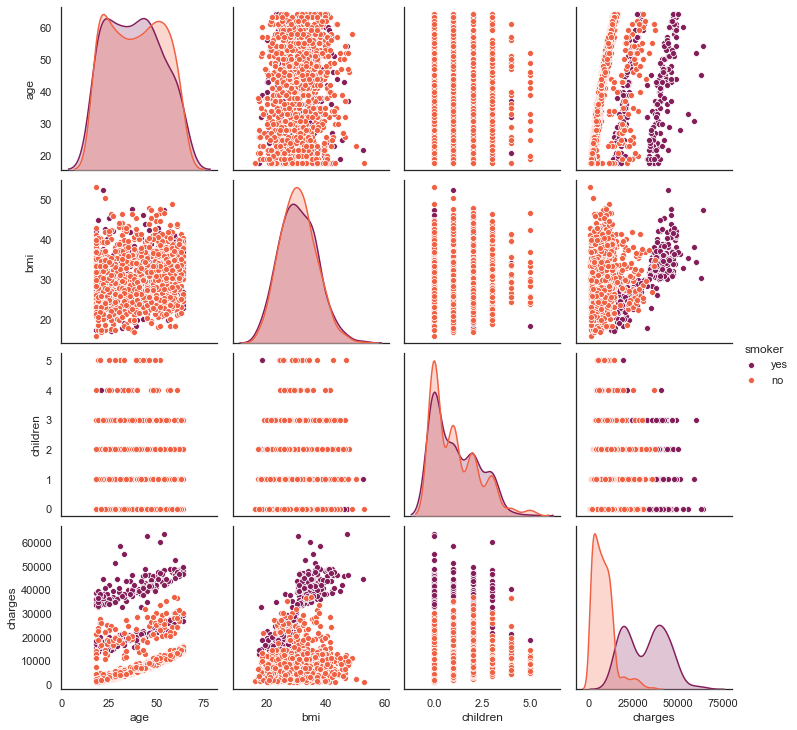

In [553]:
sns.pairplot(insurance_df, palette="rocket",hue="smoker")
plt.show()

Now, let's try to graph counts of each value. 

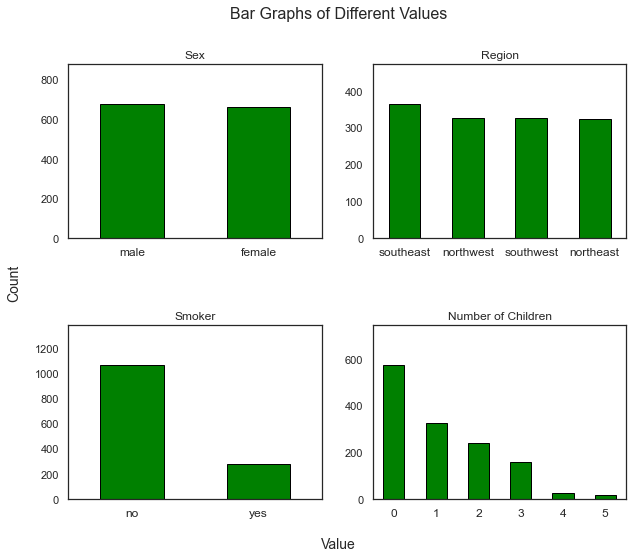

In [522]:
fig = plt.figure(figsize=(10,8))
fig.suptitle("Bar Graphs of Different Values", fontsize=16)

fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)

plt.subplot(221)
ax1=insurance_df.sex.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black',width=0.5)
ax1.margins(0.3) #zooms out graph
plt.title("Sex", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(222)
ax2=insurance_df.region.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax2.margins(0.3) #zooms out graph
plt.title("Region", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(223)
ax3=insurance_df.smoker.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax3.margins(0.3) #zooms out graph
plt.title("Smoker", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplot(224)
ax4=insurance_df.children.value_counts(ascending=False).plot(kind='bar',color='green',edgecolor='black')
ax4.margins(0.3) #zooms out graph
plt.title("Number of Children", fontsize=12)
plt.xticks(rotation='horizontal', fontsize=12)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

Trying these bar graphs in seaborn (note: seaborn cannot control bar width unlike matplotlib):

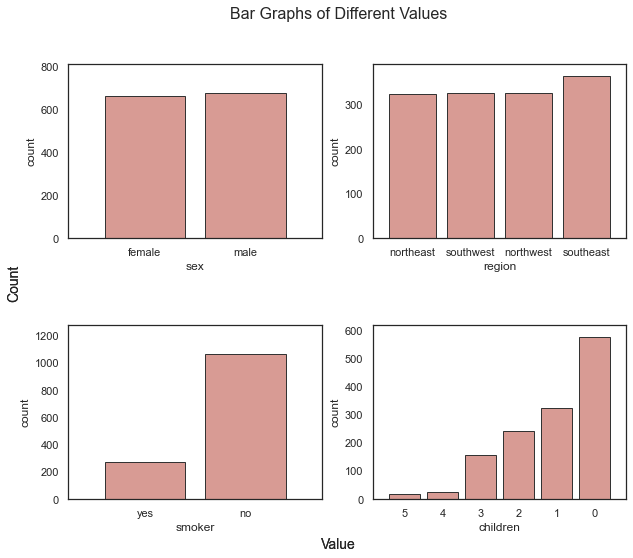

In [716]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
fig, ax = plt.subplots(2,2)
fig.suptitle("Bar Graphs of Different Values", fontsize=16)
fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)

sax1=sns.countplot(data=insurance_df, x="sex", order=insurance_df['sex'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[0][0])
sax1.margins(0.2)
sax2=sns.countplot(data=insurance_df, x="region", order=insurance_df['region'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[0][1])
sax2.margins(0.075)
sax3=sns.countplot(data=insurance_df, x="smoker", order=insurance_df['smoker'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[1][0])
sax3.margins(0.2)
sax4=sns.countplot(data=insurance_df, x="children", order=insurance_df['children'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2", ax=ax[1][1])
sax4.margins(0.075)

fig.suptitle("Bar Graphs of Different Values", fontsize=16)
fig.text(0.5, 0.04, 'Value', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical',fontsize=14)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

#seaborn plotting styles for barplots http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=bar

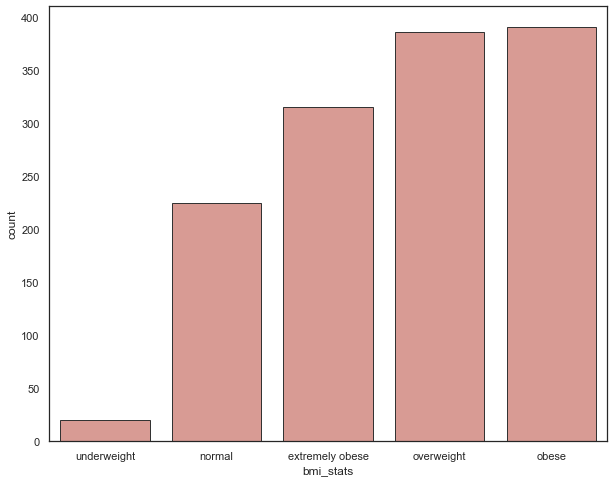

In [715]:
sns.countplot(data=insurance_df, x="bmi_stats", order=insurance_df['bmi_stats'].value_counts(ascending=True).index, color="salmon", saturation=.5, edgecolor=".2")

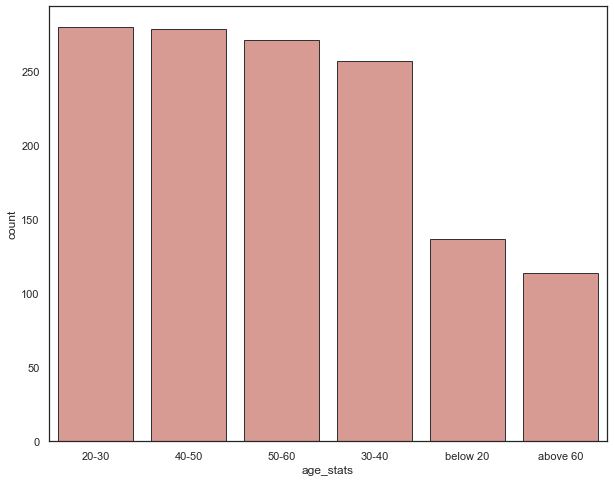

In [719]:
sns.countplot(data=insurance_df, x="age_stats", order=insurance_df['age_stats'].value_counts().index, color="salmon", saturation=.5, edgecolor=".2")

What is the smoker distribution among sexes? 

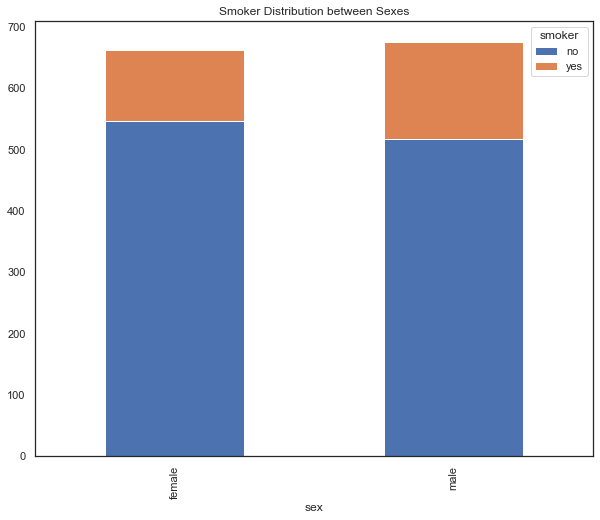

In [694]:
insurance_df.groupby(['sex','smoker']).size().unstack().plot(kind='bar',stacked=True,title="Smoker Distribution between Sexes")

What is the smoker distribution among regions?

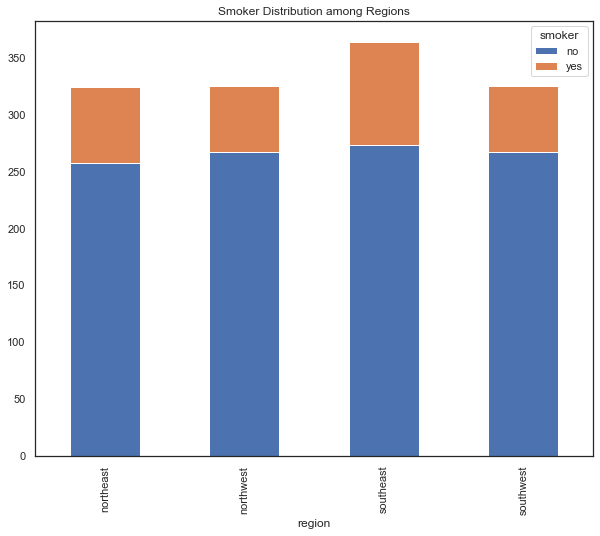

In [699]:
insurance_df.groupby(['region','smoker']).size().unstack().plot(kind='bar',stacked=True,title="Smoker Distribution among Regions")

Creating a pie chart to see distribution of people per region. 

Text(0, 0.5, '')

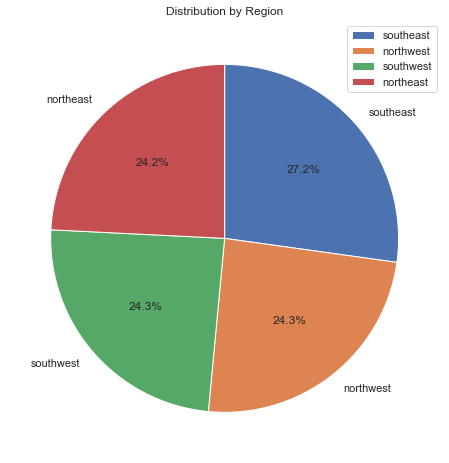

In [545]:
pie = insurance_df['region'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by Region',autopct='%1.1f%%', startangle=90)
plt.legend(loc='upper right')
pie.set_ylabel('')

Text(0, 0.5, '')

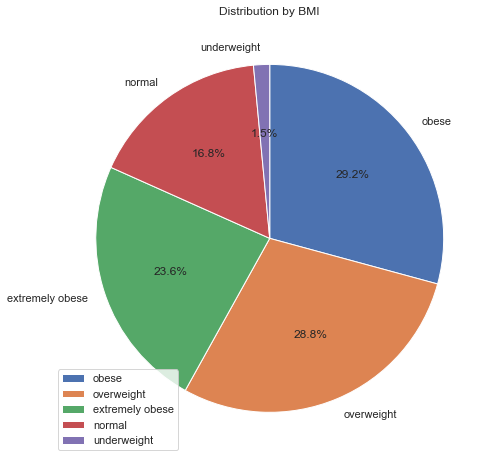

In [734]:
pie = insurance_df['bmi_stats'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by BMI',autopct='%1.1f%%', startangle=90)
plt.legend(loc='lower left')
pie.set_ylabel('')

Text(0, 0.5, '')

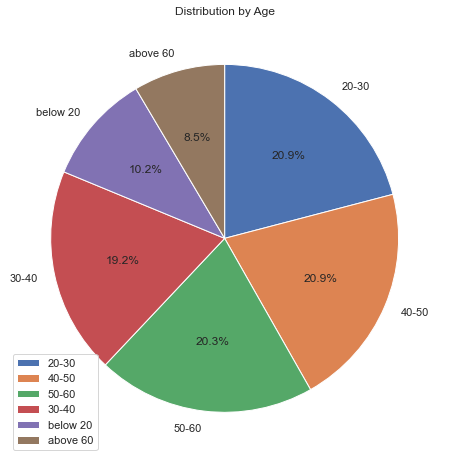

In [735]:
pie = insurance_df['age_stats'].value_counts().plot(kind="pie",counterclock=False,title='Distribution by Age',autopct='%1.1f%%', startangle=90)
plt.legend(loc='lower left')
pie.set_ylabel('')

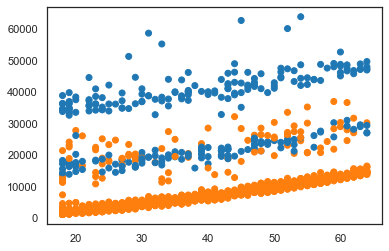

In [638]:
#Using matplotlib to plot age and charges with smokers taken into account while using seaborn for the color 

smoker_labels = insurance_df['smoker'].unique()

# List of colors
color_values = sns.color_palette("tab10")

# smoker label to color
color_map = dict(zip(smoker_labels, color_values))

# Finally use the mapped values
plt.scatter(insurance_df['age'], insurance_df['charges'], c=insurance_df['smoker'].map(color_map))

It's easier to do it in Seaborn.

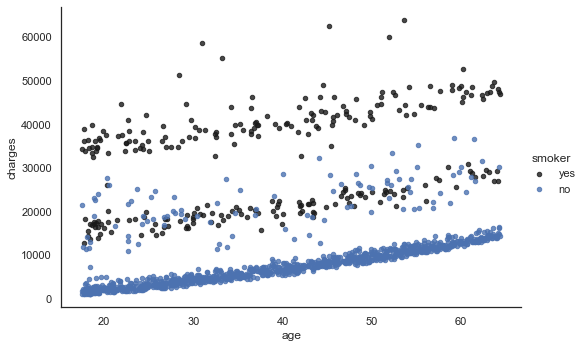

In [679]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.lmplot(data=insurance_df, x = "age" , y ="charges", fit_reg=False, hue = "smoker", palette=dict(yes="k", no="b"),size=5, aspect=1.5, x_jitter=0.5, y_jitter=0.5, scatter_kws = {"s":20})

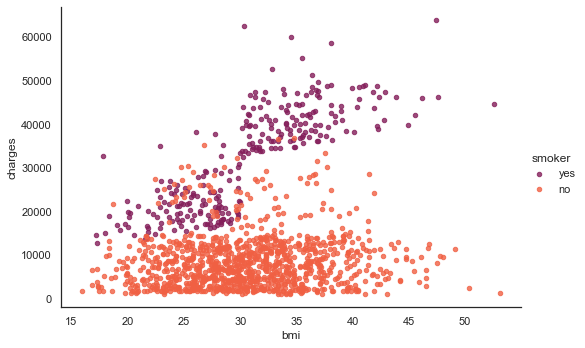

In [680]:
sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.lmplot(data=insurance_df, x = "bmi" , y ="charges", fit_reg = False , palette="rocket", hue = "smoker",  size= 5, aspect = 1.5, scatter_kws = {"s":20})

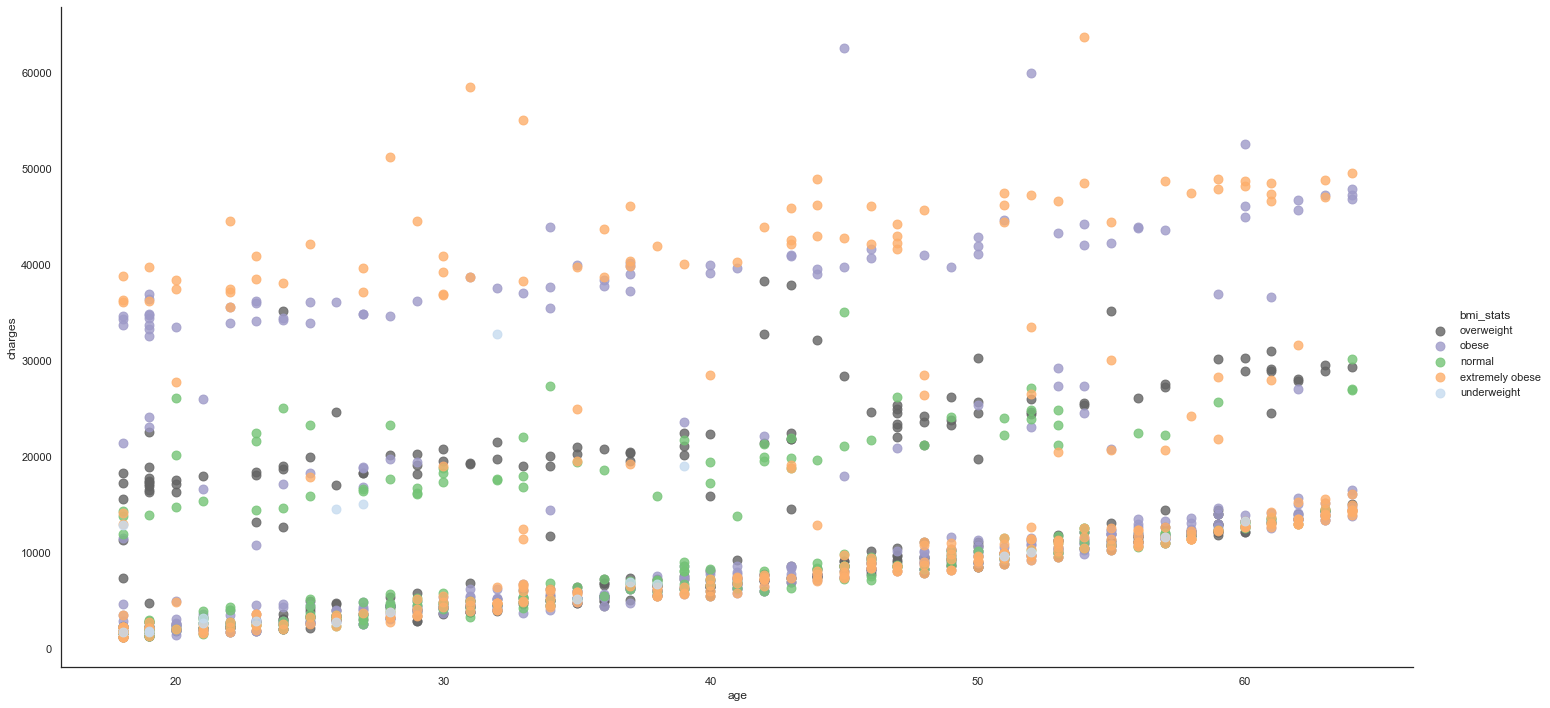

In [69]:
#sns.set(style='white', rc={'figure.figsize':(10,8)})
sns.lmplot(data=insurance_df, x = "age" , y ="charges", fit_reg = False , palette="tab20c_r", hue = "bmi_stats",  size= 10, aspect = 2, scatter_kws = {"s" :80})

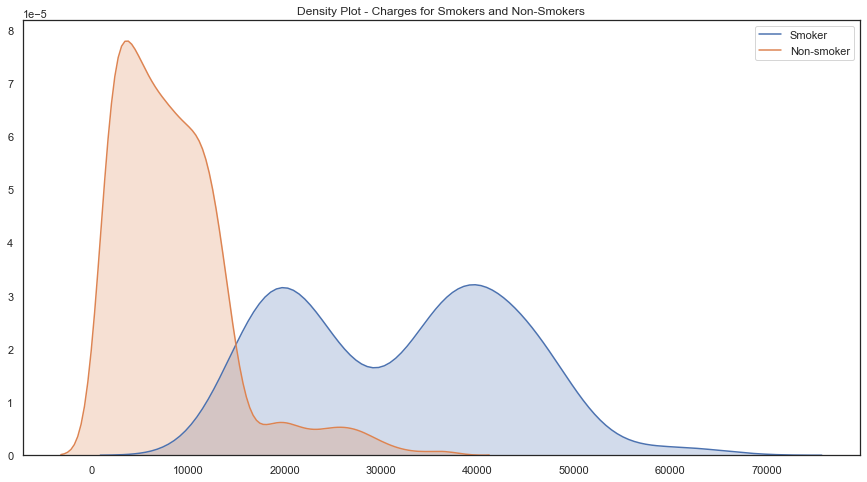

In [704]:
plt.figure(figsize=(15,8))
sns.kdeplot(insurance_df["charges"][insurance_df.smoker == 'yes'], shade=True)
sns.kdeplot(insurance_df["charges"][insurance_df.smoker == 'no'], shade=True)
plt.legend(['Smoker', 'Non-smoker'])
plt.title('Density Plot - Charges for Smokers and Non-Smokers')
plt.show()

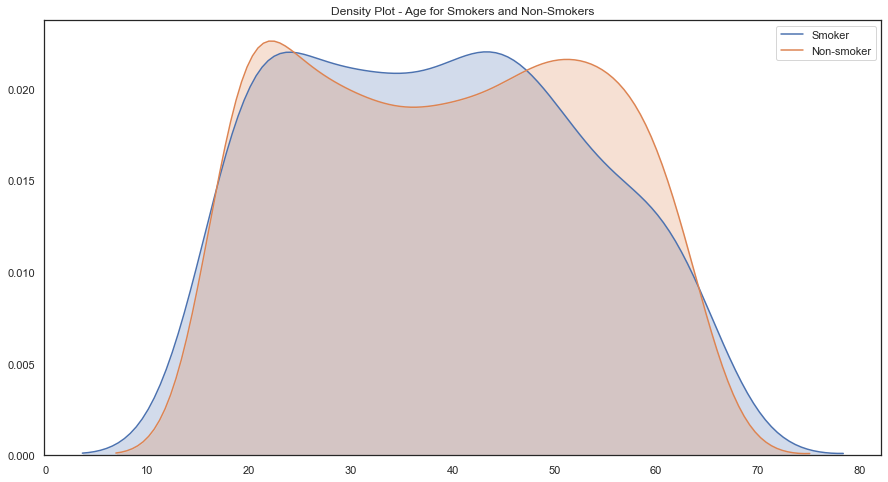

In [705]:
plt.figure(figsize=(15,8))
sns.kdeplot(insurance_df["age"][insurance_df.smoker == 'yes'], shade=True)
sns.kdeplot(insurance_df["age"][insurance_df.smoker == 'no'], shade=True)
plt.legend(['Smoker', 'Non-smoker'])
plt.title('Density Plot - Age for Smokers and Non-Smokers')
plt.show()

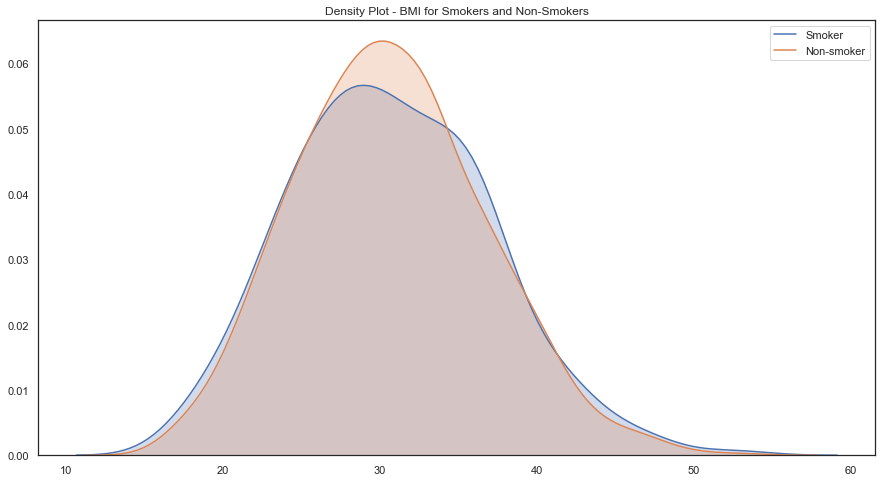

In [702]:
plt.figure(figsize=(15,8))
sns.kdeplot(insurance_df["bmi"][insurance_df.smoker == 'yes'], shade=True)
sns.kdeplot(insurance_df["bmi"][insurance_df.smoker == 'no'], shade=True)
plt.legend(['Smoker', 'Non-smoker'])
plt.title('Density Plot - BMI for Smokers and Non-Smokers')
plt.show()

Now, let's try to visualize the data using boxplot which shows how data is well distributed in the dataset. We can see her that there are outliers in the BMI. 

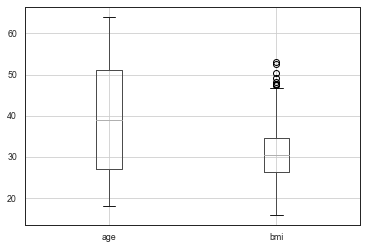

In [360]:
insurance_df.boxplot(column=['age','bmi'])
plt.show()

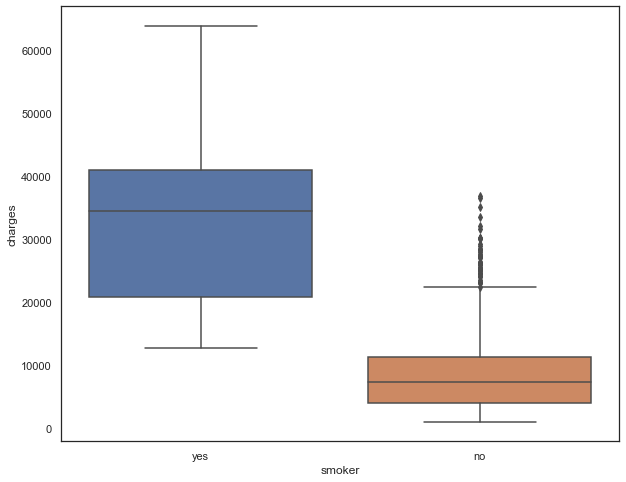

In [684]:
sns.boxplot(data=insurance_df, y='charges',x="smoker")

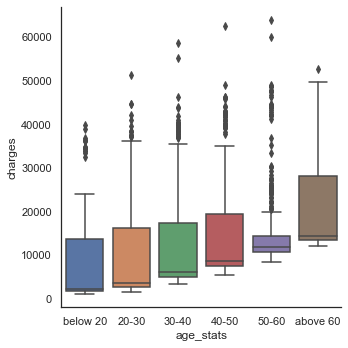

In [724]:
sns.catplot(data=insurance_df, y='charges',x='age_stats', kind='box')

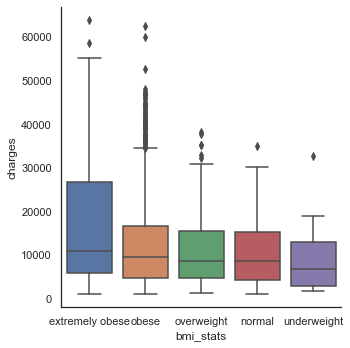

In [725]:
sns.catplot(data=insurance_df, y='charges',x='bmi_stats', kind='box')

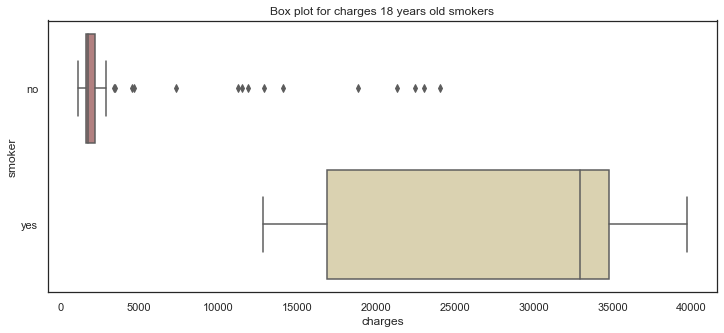

In [747]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers below 20 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age < 20)] , orient="h", palette = 'pink')

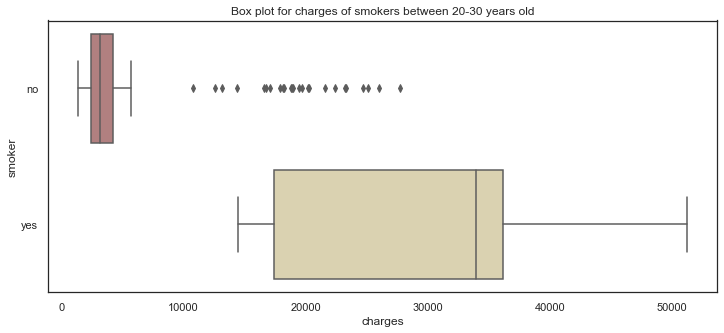

In [752]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers between 20-30 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age_stats == '20-30')] , orient="h", palette = 'pink')

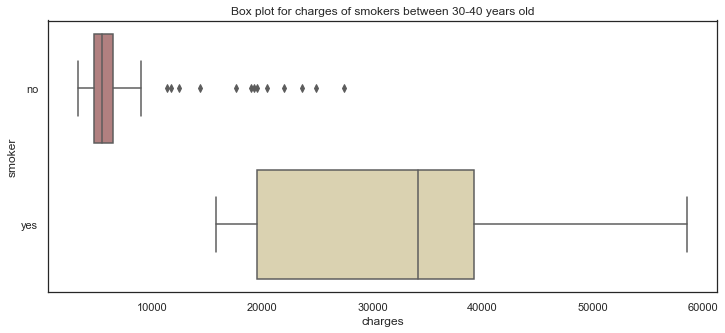

In [755]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers between 30-40 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age_stats == '30-40')] , orient="h", palette = 'pink')

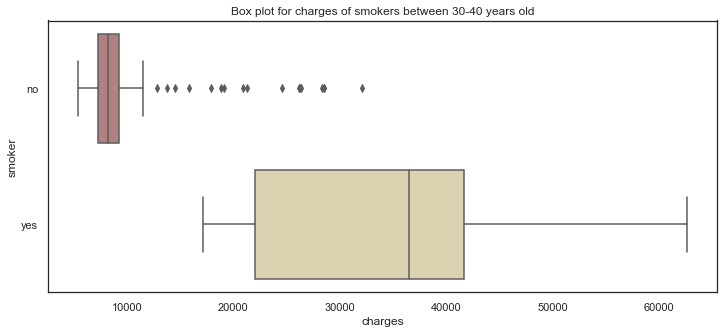

In [756]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers between 40-50 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age_stats == '40-50')] , orient="h", palette = 'pink')

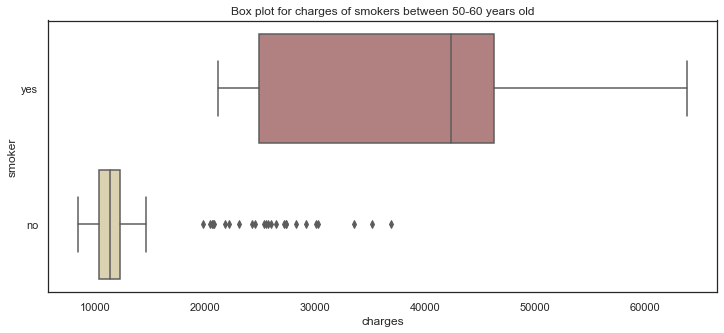

In [757]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers between 50-60 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age_stats == '50-60')] , orient="h", palette = 'pink')

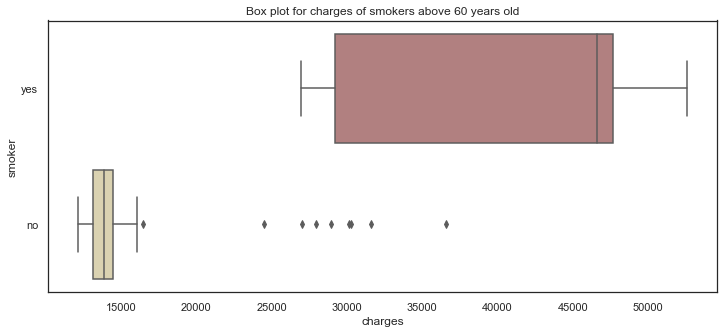

In [758]:
# Box plot for charges 18 years old smokers
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers above 60 years old")
sns.boxplot(y="smoker", x="charges", data = insurance_df[(insurance_df.age_stats == 'above 60')] , orient="h", palette = 'pink')

In [726]:
#correlations
corr=insurance_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [7]:
# Convert strings to onehot encoding
onehot_df = pd.get_dummies(insurance_df)
onehot_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
#correlations
corr=onehot_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.020856,0.025019,-0.025019,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.046371,-0.003750,0.003750,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.017163,-0.007673,0.007673,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.057292,-0.787251,0.787251,0.006349,-0.039905,0.073982,-0.043210
sex_female,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-1.000000,0.076185,-0.076185,0.002425,0.011156,-0.017117,0.004184
sex_male,-0.020856,0.046371,0.017163,0.057292,-1.000000,1.000000,-0.076185,0.076185,-0.002425,-0.011156,0.017117,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,0.076185,-0.076185,1.000000,-1.000000,-0.002811,0.036945,-0.068498,0.036945
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-0.076185,0.076185,-1.000000,1.000000,0.002811,-0.036945,0.068498,-0.036945
region_northeast,0.002475,-0.138156,-0.022808,0.006349,0.002425,-0.002425,-0.002811,0.002811,1.000000,-0.320177,-0.345561,-0.320177
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,0.011156,-0.011156,0.036945,-0.036945,-0.320177,1.000000,-0.346265,-0.320829


It is obvious that being a smoker is highly correlated with the insurance charges. 

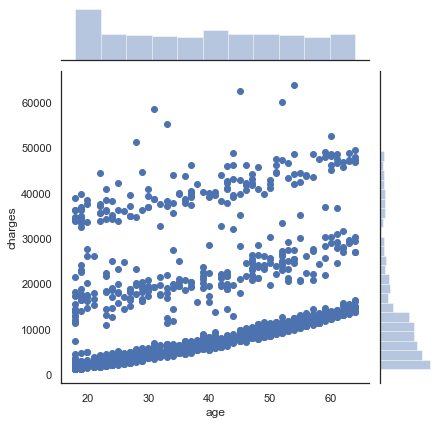

In [6]:
sns.jointplot(data=insurance_df,x="age",y="charges")